In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='iso-8859-1')
df.head()

C:\Users\Mahmoud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Walking through the data to clean it

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### We will take the attributes that we will use only  

In [5]:
new_df = df[['iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude','attacktype1_txt',
                                 'nkill','nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

### The new data frame that we will use at Visualization 

In [6]:
new_df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
new_df.shape

(181691, 18)

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  target1          181055 non-null  object 
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  targtype1_txt    181691 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

In [9]:
new_df.isna().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
nkill               10313
nwound              16311
target1               636
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

In [10]:
new_df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## Visualization

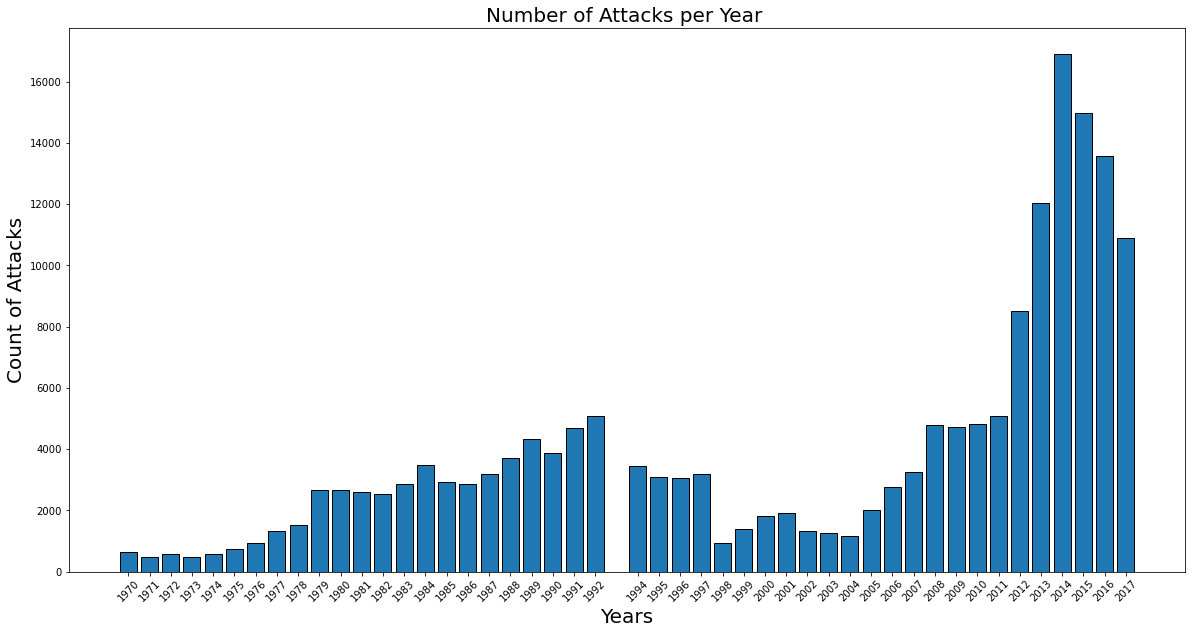

In [11]:
plt.figure(figsize=(20,10))
plt.bar(new_df['iyear'].value_counts().index,new_df['iyear'].value_counts(),edgecolor='black')
plt.xticks(new_df['iyear'].unique(),rotation=45,fontsize='10')
plt.title("Number of Attacks per Year ",fontsize='20')
plt.xlabel("Years",fontsize='20')
plt.ylabel("Count of Attacks",fontsize='20')
plt.show()

In [30]:
#Convering numbers to string
new_df['imonth'].astype(str)

0          7
1          0
2          1
3          1
4          1
          ..
181686    12
181687    12
181688    12
181689    12
181690    12
Name: imonth, Length: 181691, dtype: object

In [32]:
# We will replace The number of monthes with its names 
new_df['imonth']=new_df['imonth'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['Unknow Month','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

<ipython-input-32-d287683dd9e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['imonth']=new_df['imonth'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['Unknow Month','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


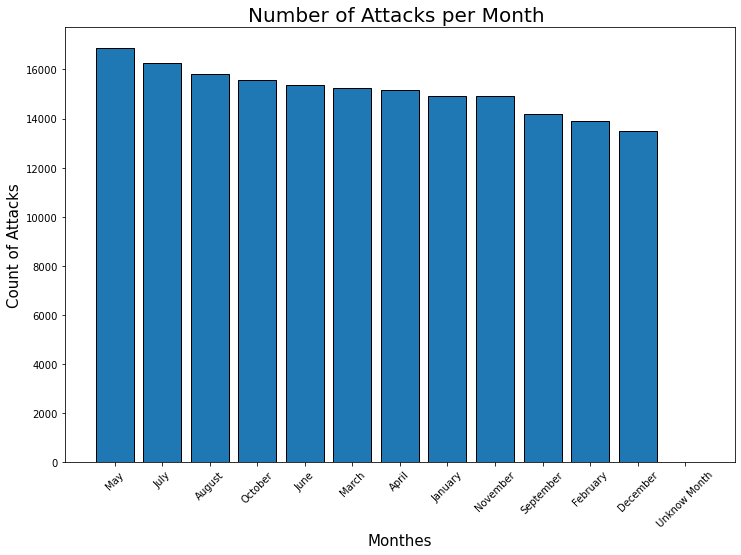

In [33]:
plt.figure(figsize=(12,8))
plt.bar(new_df['imonth'].value_counts().index,new_df['imonth'].value_counts(),edgecolor='black')
plt.xticks(rotation=45,fontsize='10')
plt.title("Number of Attacks per Month ",fontsize='20')
plt.xlabel("Monthes",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

In [18]:
#Convering Value counts to data frame
num_c=new_df['country_txt'].value_counts().to_frame()

In [19]:
#Top 20 countries in terrorism attacks
nn=num_c.head(20)
nn

,country_txt
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


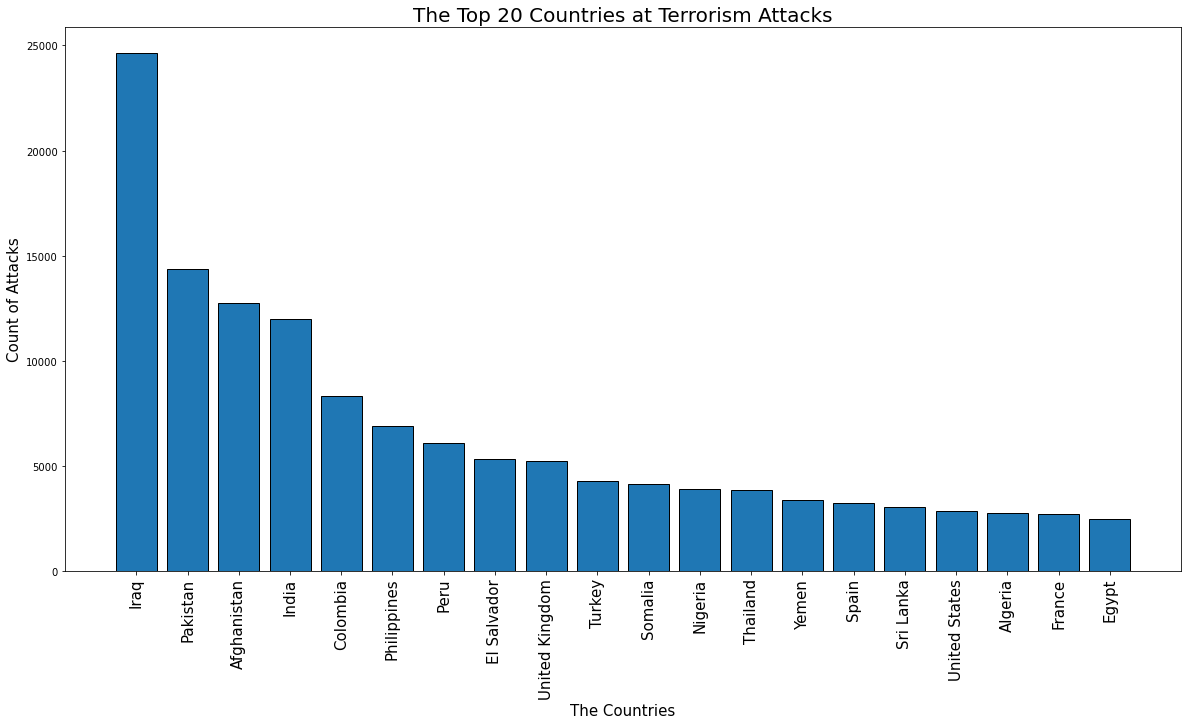

In [20]:
plt.figure(figsize=(20,10))
plt.bar(nn.index,nn['country_txt'],edgecolor='black')
plt.title("The Top 20 Countries at Terrorism Attacks",fontsize='20')
plt.xticks(rotation=90,fontsize='15')
plt.xlabel("The Countries",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

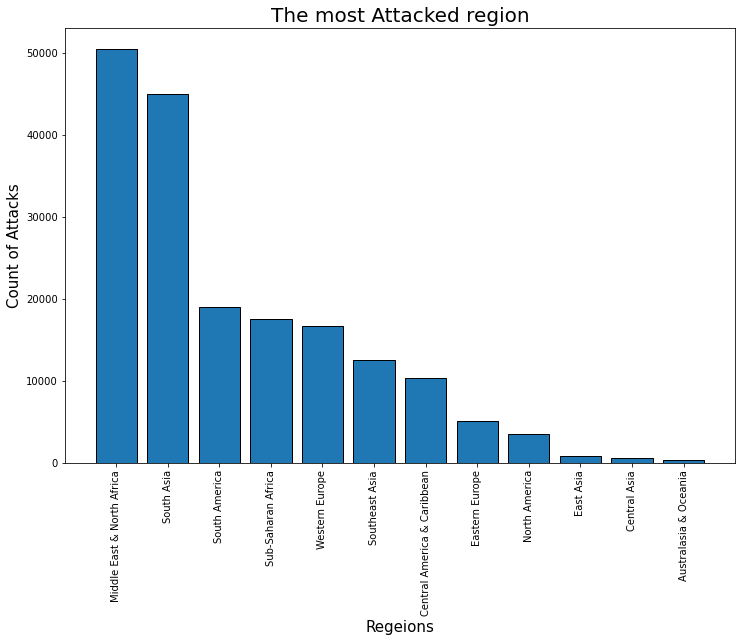

In [21]:
plt.figure(figsize=(12,8))
plt.bar(new_df['region_txt'].value_counts().index,new_df['region_txt'].value_counts(),edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The most Attacked region",fontsize='20')
plt.xlabel("Regeions",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

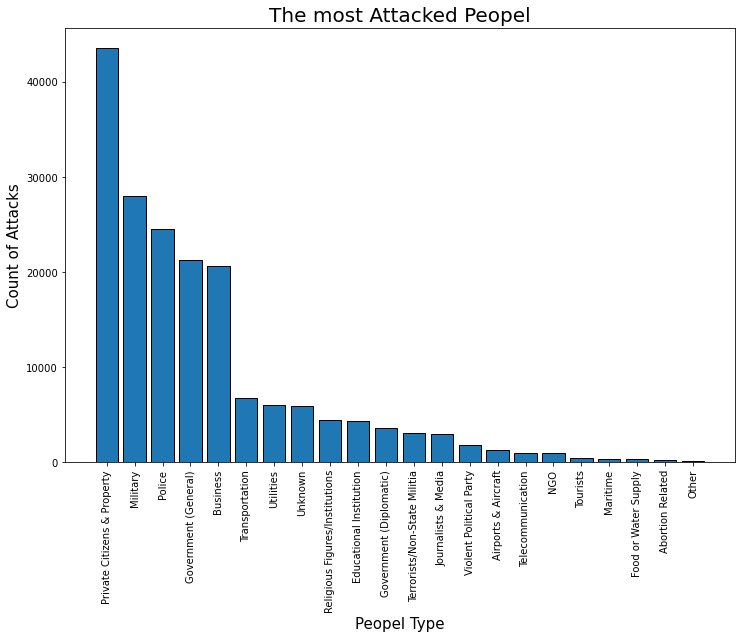

In [44]:
plt.figure(figsize=(12,8))
plt.bar(new_df['targtype1_txt'].value_counts().index,new_df['targtype1_txt'].value_counts(),edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The most Attacked Peopel",fontsize='20')
plt.xlabel("Peopel Type",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

<ipython-input-23-b7d0ac30db66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['weaptype1_txt']=new_df['weaptype1_txt'].replace(["Other","Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"],["Unknown","Vehicle"])


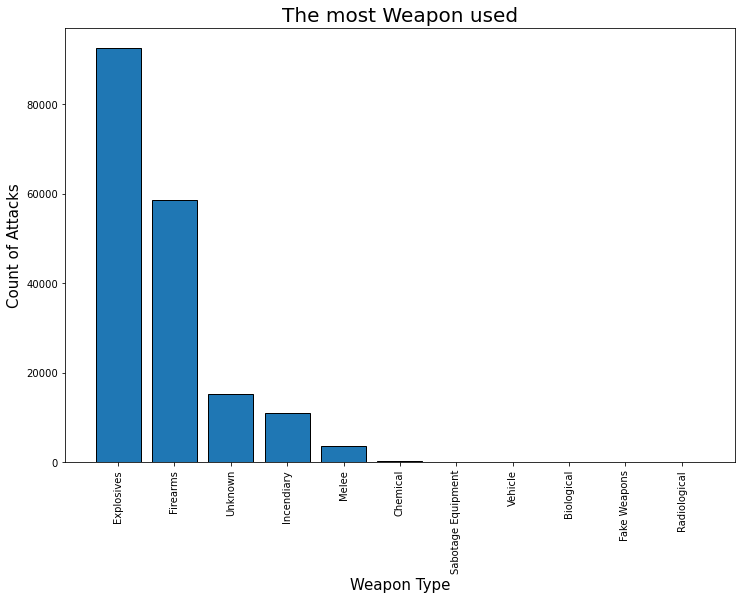

In [23]:
new_df['weaptype1_txt']=new_df['weaptype1_txt'].replace(["Other","Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"],["Unknown","Vehicle"])
plt.figure(figsize=(12,8))
plt.bar(new_df['weaptype1_txt'].value_counts().index,new_df['weaptype1_txt'].value_counts(),edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The most Weapon used",fontsize='20')
plt.xlabel("Weapon Type",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

In [24]:
#Making a data Frame Which containes the counts of all attributes(Killed and Wounded peopel)
count_df=new_df.groupby('iyear').sum()
count_df.tail()

,imonth,iday,latitude,longitude,nkill,nwound
iyear,,,,,,
2013,83877,193930,319946.622256,667008.858111,22273.0,37688.0
2014,106561,263567,450298.725345,835293.236928,44490.0,41128.0
2015,94167,235939,398489.570982,753916.190446,38853.0,44043.0
2016,86313,211833,347519.946882,678154.182005,34871.0,40001.0
2017,68973,174519,271800.614077,562632.805935,26445.0,24927.0


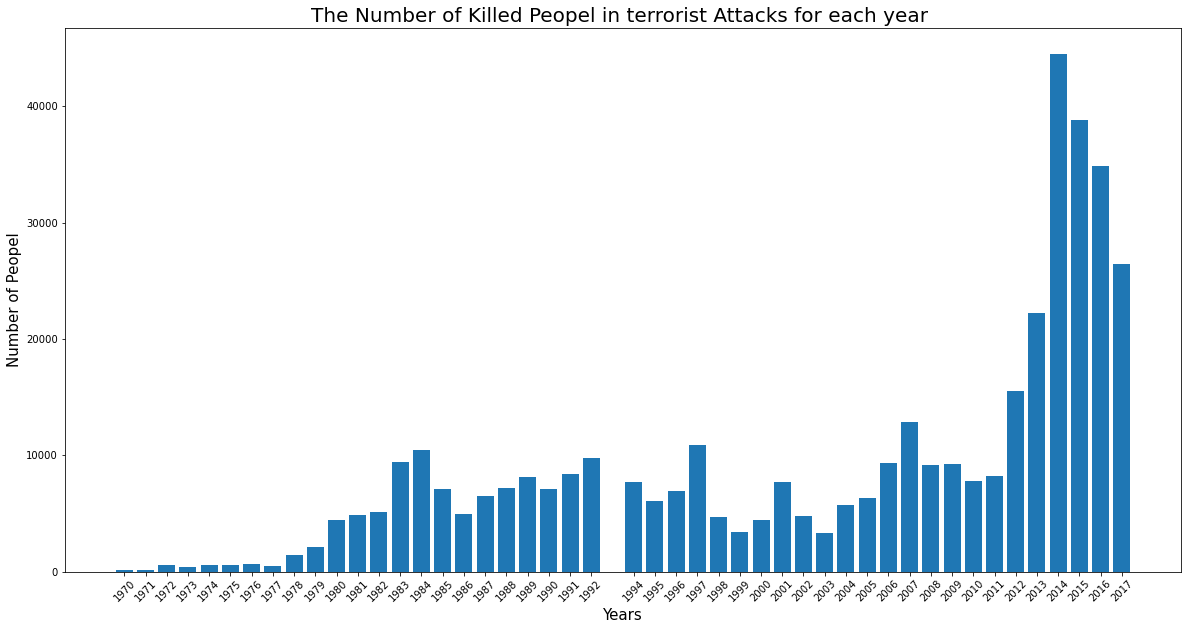

In [25]:
plt.figure(figsize=(20,10))
plt.bar(count_df.index,count_df.nkill)
plt.title("The Number of Killed Peopel in terrorist Attacks for each year ",fontsize=20)
plt.xticks(count_df.index,rotation=45,fontsize=10)
plt.xlabel("Years",fontsize='15')
plt.ylabel("Number of Peopel",fontsize='15')
plt.show()

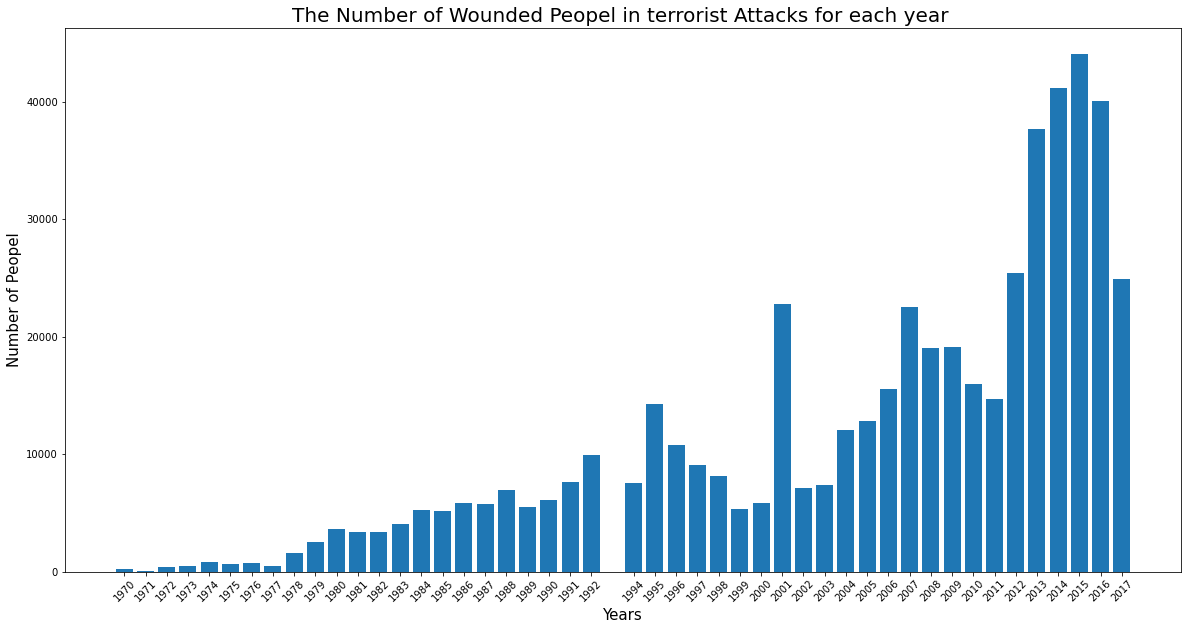

In [26]:
plt.figure(figsize=(20,10))
plt.bar(count_df.index,count_df.nwound)
plt.title("The Number of Wounded Peopel in terrorist Attacks for each year ",fontsize=20)
plt.xticks(count_df.index,rotation=45)
plt.xlabel("Years",fontsize='15')
plt.ylabel("Number of Peopel",fontsize='15')
plt.show()

In [41]:
group_df=new_df['gname'].value_counts().to_frame()
gg=group_df.head(20)
gg

,gname
Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


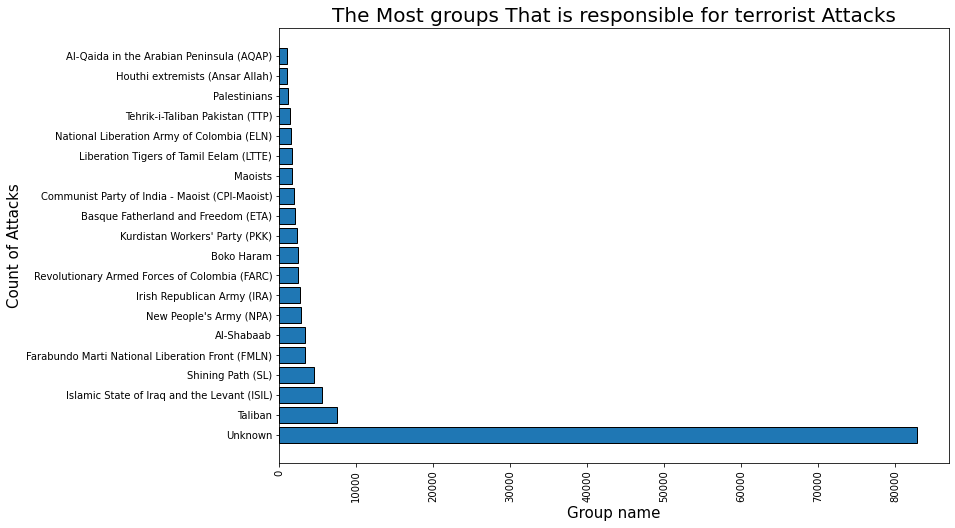

In [45]:
plt.figure(figsize=(12,8))
plt.barh(gg.index,gg['gname'],edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The Most groups That is responsible for terrorist Attacks",fontsize='20')
plt.xlabel("Group name",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

In [54]:
Egypt=new_df[new_df['country_txt'] == 'Egypt']['gname'].to_frame()
eg=Egypt.head(10)
eg

,gname
133,Unknown
1092,Black September
1181,Jordanian National Liberation Movement
5603,Unknown
6797,Palestinians
6811,Palestinians
8111,Eagles of the Palestinian Revolution
9947,Unknown
9948,Unknown
10857,Unknown


### Egypt

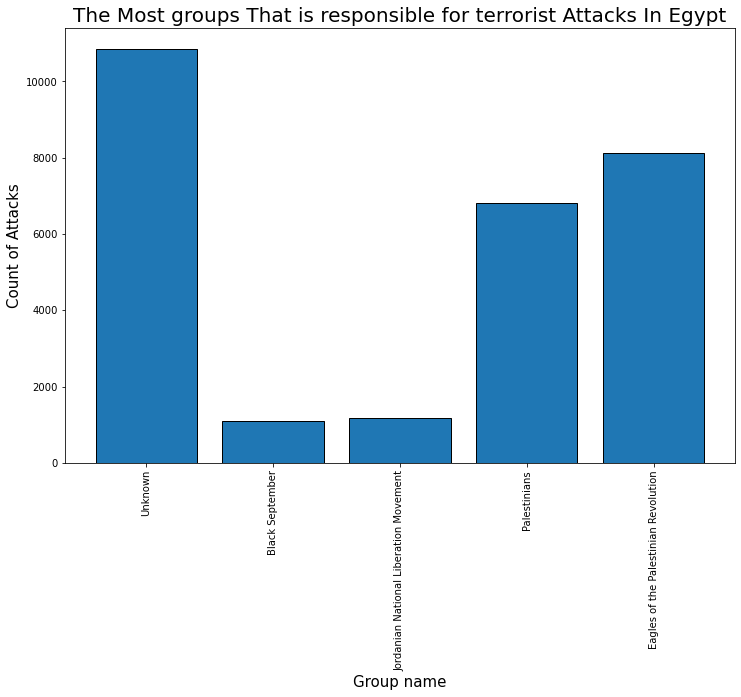

In [57]:
plt.figure(figsize=(12,8))
plt.bar(eg['gname'],eg.index,edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The Most groups That is responsible for terrorist Attacks In Egypt",fontsize='20')
plt.xlabel("Group name",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()

In [59]:
India=new_df[new_df['country_txt'] == 'India']['gname'].to_frame()
hen=India.head(10)
hen

,gname
1186,Palestinians
2764,Ananda Marga
3857,Unknown
5327,Japanese Red Army (JRA)
7337,Naga People
7342,Unknown
8174,Meitei extremists
8685,Mizo National Front
8831,Mizo National Front
8836,Mizo National Front


### India

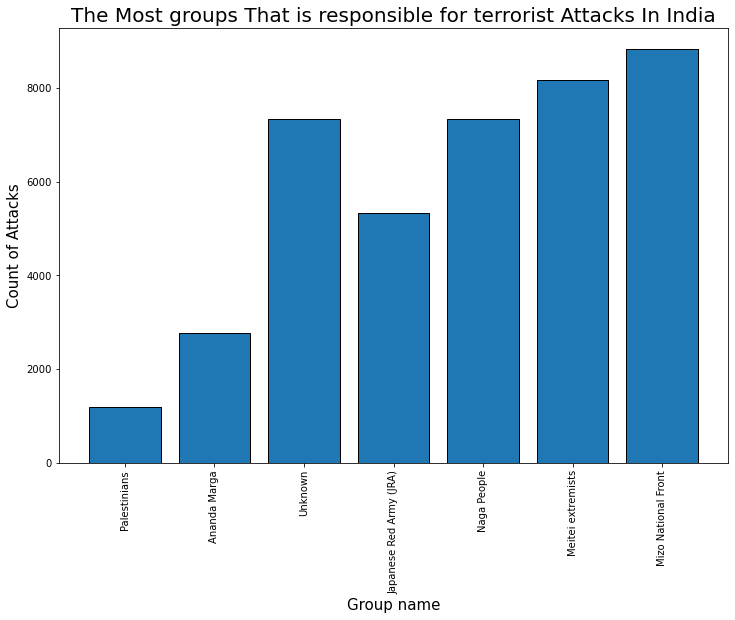

In [60]:
plt.figure(figsize=(12,8))
plt.bar(hen['gname'],hen.index,edgecolor='black')
plt.xticks(rotation=90,fontsize='10')
plt.title("The Most groups That is responsible for terrorist Attacks In India",fontsize='20')
plt.xlabel("Group name",fontsize='15')
plt.ylabel("Count of Attacks",fontsize='15')
plt.show()